## Importando as bibliotecas necessárias

In [19]:
import pandas as pd

## Carregando o arquivo CSV com os dados dos passageiros

In [20]:
passageiros=pd.read_csv("raw-data/passageiros.csv")

## Visualizando as primeiras linhas dos dados

In [21]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


## Importando a biblioteca Seaborn

In [22]:
import seaborn as sns

## Configurando o tamanho e as fontes das figuras

In [23]:
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = (10,6)
mpl.rcParams["font.size"] = 20

## Criando um gráfico de linha para visualizar a quantidade de passageiros ao longo do tempo

<Axes: xlabel='tempo', ylabel='passageiros'>

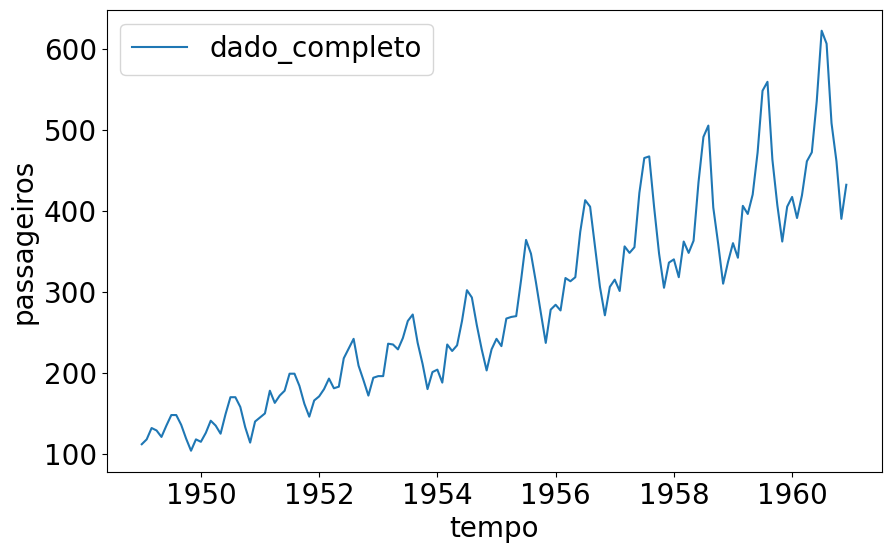

In [24]:
sns.lineplot(x="tempo", y="passageiros", data=passageiros, label="dado_completo")

## Importando o StandardScaler da biblioteca Scikit-learn para escalonamento dos dados

In [25]:
from sklearn.preprocessing import StandardScaler

## Instanciando o StandardScaler

In [26]:
sc=StandardScaler()

## Ajustando o StandardScaler aos dados

In [27]:
sc.fit(passageiros)

StandardScaler()

## Normalizando os dados

In [28]:
dado_normalizado=sc.transform(passageiros)

## Separando os dados normalizados em variáveis x e y

In [29]:
x=dado_normalizado[:,0]
y=dado_normalizado[:,1]

## Importando o Matplotlib para visualização

In [30]:
import matplotlib.pyplot as plt

## Plotando os dados normalizados em um gráfico de linha

Text(0.5, 0, 'Data')

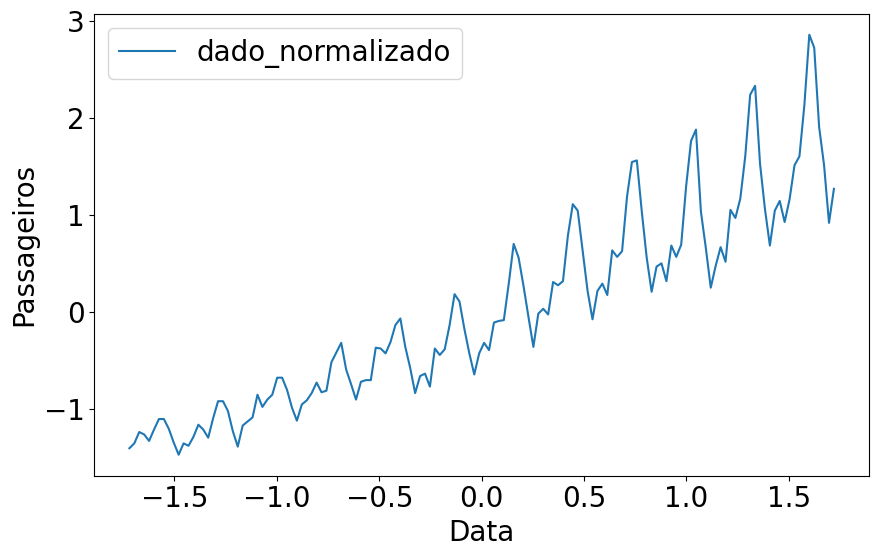

In [31]:
sns.lineplot(x=x, y=y, label="dado_normalizado")
plt.ylabel("Passageiros")
plt.xlabel("Data")

## Definindo os tamanhos de treino e teste

In [32]:
size_treino=int(len(passageiros)*0.9)
size_teste=len(passageiros)-size_treino

## Separando os dados de treino

In [33]:
x_treino=x[0:size_treino]
y_treino=y[0:size_treino]

## Separando os dados de teste

In [34]:
x_teste=x[size_treino:len(passageiros)]
y_teste=y[size_treino:len(passageiros)]

## Plotando os dados de treino e teste

Text(0.5, 0, 'Data')

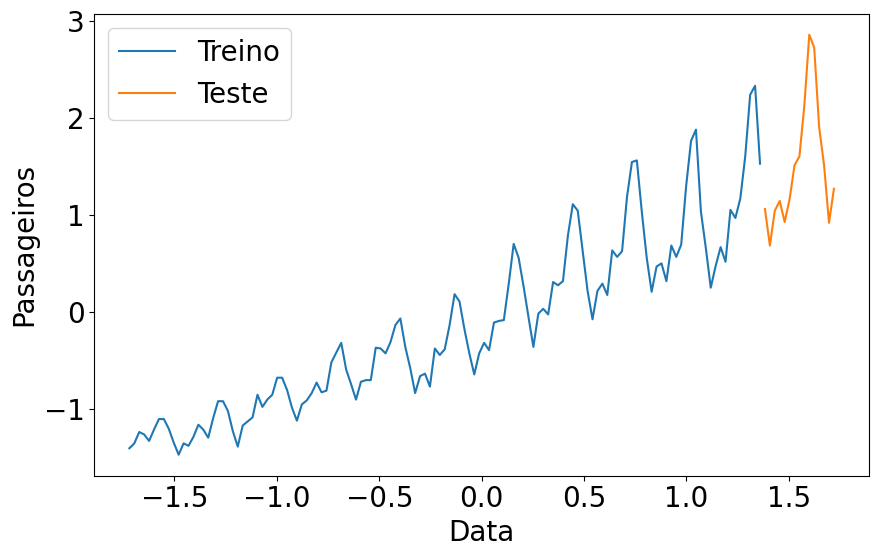

In [35]:
sns.lineplot(x=x_treino, y=y_treino, label="Treino")
sns.lineplot(x=x_teste, y=y_teste, label="Teste")
plt.ylabel("Passageiros")
plt.xlabel("Data")

## Importando as classes Sequential e Dense do TensorFlow

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2025-03-25 10:17:57.533415: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-25 10:17:58.287443: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-25 10:17:58.498031: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742908678.657951   98203 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742908678.700729   98203 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742908679.070638   98203 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

## Criando uma instância do modelo Sequential
Aqui estamos criando um modelo sequencial, que será usado para empilhar camadas de uma rede neural.

In [37]:
regressor=Sequential()

## Adicionando uma camada densa com ativação linear
Aqui estamos adicionando uma camada densa ao modelo, com 1 neurônio e ativação linear. O kernel é inicializado com valores "Ones" e a camada não utiliza bias.

In [38]:
regressor.add(Dense(1, input_dim=1, kernel_initializer="Ones", activation="linear", use_bias=False))

/home/heitorccf/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-25 10:18:03.738317: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


## Compilando o modelo
Nesta célula, o modelo é compilado com a função de perda mean squared error (erro quadrático médio) e o otimizador adam, que ajustará os pesos durante o treinamento.

In [39]:
regressor.compile(loss="mean_squared_error", optimizer="adam")

## Exibindo o resumo do modelo
Aqui, o método summary é usado para visualizar a arquitetura do modelo, incluindo o número de parâmetros treináveis em cada camada.

In [40]:
regressor.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             1 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1 (4.00 B)

 Trainable params: 1 (4.00 B)

 Non-trainable params: 0 (0.00 B)

## Treinando o modelo
Nesta célula, o modelo é treinado com os dados de treino x_treino e y_treino.

In [41]:
regressor.fit(x_treino, y_treino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1294  


## Fazendo previsões com o modelo
Aqui estamos utilizando o método predict para gerar as previsões com base nos dados de treino.

In [42]:
y_pred=regressor.predict(x_treino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


## Plotando o resultado do treino e as previsões
Nesta célula, são plotados os valores reais do treino e as previsões geradas pelo modelo em um gráfico de linha para comparação.

<Axes: >

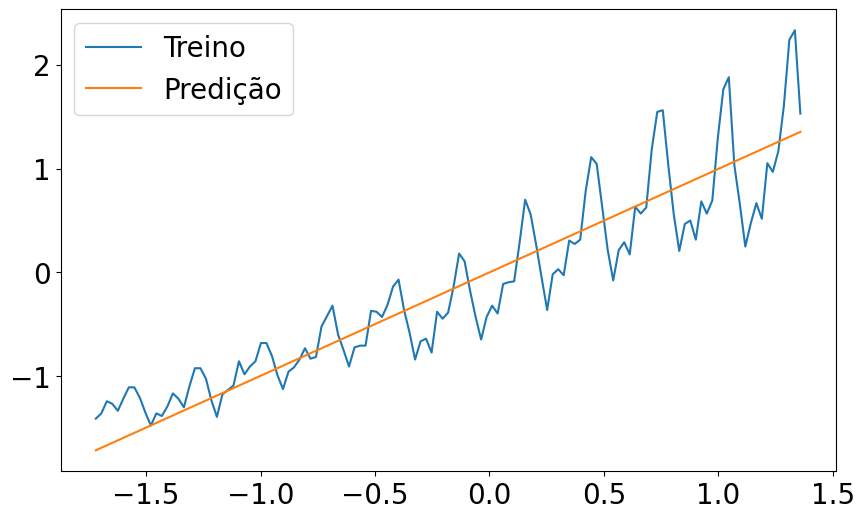

In [43]:
sns.lineplot(x=x_treino, y=y_treino, label="Treino")
sns.lineplot(x=x_treino, y=y_pred[:,0], label="Predição")

## Criando um dicionário com os dados para o DataFrame

In [44]:
d={"Tempo": x_treino, "Passageiros": y_pred[:,0]}

## Criando um DataFrame com o dicionário de dados

In [45]:
resultado=pd.DataFrame(data=d)

## Exibindo o DataFrame resultante

In [46]:
resultado

,Tempo,Passageiros
0,-1.720064,-1.712705
1,-1.696007,-1.688751
2,-1.671950,-1.664797
3,-1.647894,-1.640843
4,-1.623837,-1.616889
...,...,...
124,1.262984,1.257581
125,1.287041,1.281535
126,1.311098,1.305488
127,1.335155,1.329442


## Aplicando a transformação inversa para voltar à escala original
Nesta célula, estamos utilizando inverse_transform para aplicar a transformação inversa no DataFrame resultado, retornando os valores à escala original.

In [47]:
resultado_transf=sc.inverse_transform(resultado)

## Criando um DataFrame com os dados transformados
Aqui, criamos um DataFrame com os dados transformados para a escala original, armazenando em resultado_transf.

In [48]:
resultado_transf=pd.DataFrame(resultado_transf)

## Renomeando as colunas do DataFrame transformado
Nesta célula, estamos renomeando as colunas de resultado_transf para "Tempo" e "Passageiros" para que elas correspondam aos nomes das colunas do DataFrame original.

In [49]:
resultado_transf.columns=["Tempo", "Passageiros"]

## Plotando os dados originais e ajustados
Aqui, utilizamos o seaborn.lineplot para plotar os dados originais de passageiros e o ajuste de treino em dois gráficos de linha distintos para comparação.

<Axes: xlabel='tempo', ylabel='passageiros'>

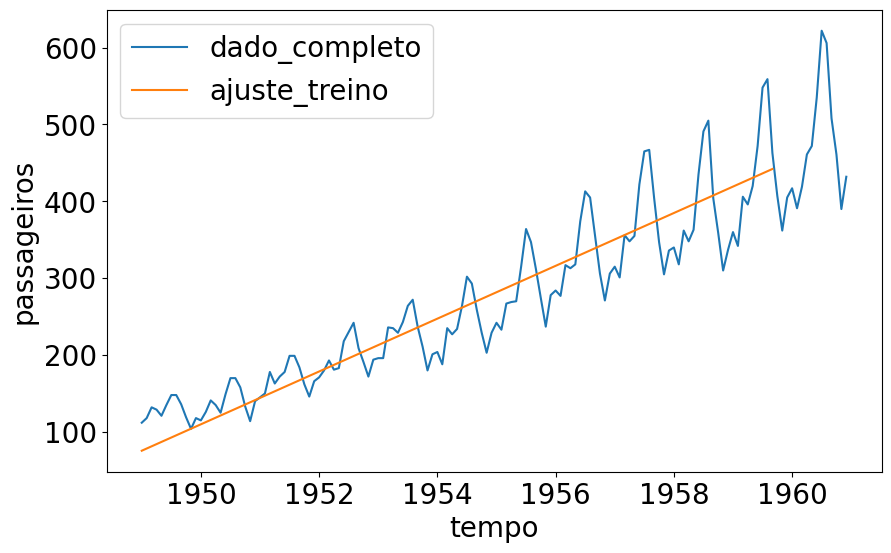

In [50]:
sns.lineplot(x="tempo", y="passageiros", data=passageiros, label="dado_completo")
sns.lineplot(x="Tempo", y="Passageiros", data=resultado_transf, label="ajuste_treino")

## Fazendo previsões com os dados de teste

In [51]:
y_pred_teste=regressor.predict(x_teste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


## Criando um dicionário com as previsões do teste
Nesta célula, criamos um dicionário com as colunas "Tempo" e "Passageiros", onde "Tempo" contém os dados de x_teste e "Passageiros" contém as previsões de y_pred_teste.

In [52]:
d={"Tempo": x_teste, "Passageiros": y_pred_teste[:,0]}
resultado_teste=pd.DataFrame(data=d)

## Aplicando a transformação inversa aos dados de teste
Aqui aplicamos a função inverse_transform ao DataFrame de teste para retornar os dados à escala original.

In [53]:
resultado_transf_teste=sc.inverse_transform(resultado_teste)

## Criando um DataFrame com os dados transformados do teste
Nesta célula, criamos um novo DataFrame com os dados de teste transformados, armazenando-o como resultado_transf_teste.

In [54]:
resultado_transf_teste=pd.DataFrame(resultado_transf_teste)

## Renomeando as colunas do DataFrame de teste transformado

In [55]:
resultado_transf_teste.columns=["Tempo", "Passageiros"]

## Plotando os dados reais, o ajuste de treino e as previsões do teste
Nesta célula, são gerados gráficos de linha com os dados reais, o ajuste de treino e as previsões feitas sobre os dados de teste, permitindo comparar os três conjuntos de dados.

<Axes: xlabel='tempo', ylabel='passageiros'>

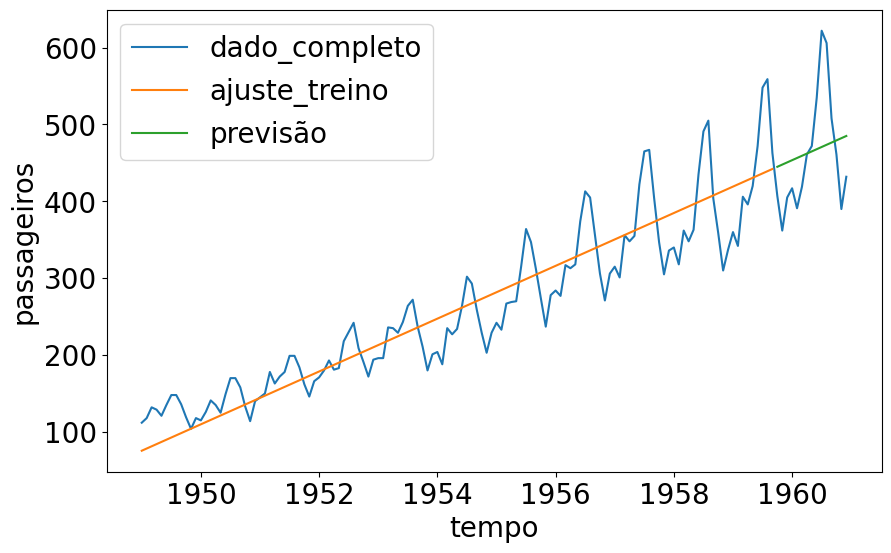

In [56]:
sns.lineplot(x="tempo", y="passageiros", data=passageiros, label="dado_completo")
sns.lineplot(x="Tempo", y="Passageiros", data=resultado_transf, label="ajuste_treino")
sns.lineplot(x="Tempo", y="Passageiros", data=resultado_transf_teste, label="previsão")

## Criando um novo modelo sequencial

In [57]:
regressor2=Sequential()

## Adicionando camadas densas ao modelo
Estamos adicionando três camadas densas (Dense) ao modelo:
1. A primeira camada com 8 neurônios e dimensão de entrada 1, com inicialização aleatória (random_uniform) e ativação linear.
2. A segunda camada com 8 neurônios, também com inicialização aleatória e ativação linear.
3. A terceira camada com 1 neurônio, para produzir a saída final, novamente com inicialização aleatória e ativação linear. Em todas as camadas, o bias não é utilizado.

In [58]:
regressor2.add(Dense(8, input_dim=1, kernel_initializer="random_uniform", activation="linear", use_bias=False))
regressor2.add(Dense(8, kernel_initializer="random_uniform", activation="linear", use_bias=False))
regressor2.add(Dense(1, kernel_initializer="random_uniform", activation="linear", use_bias=False))

/home/heitorccf/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compilando o novo modelo
Nesta célula, estamos compilando o modelo regressor2 utilizando a função de perda mean squared error (erro quadrático médio) e o otimizador adam.

In [59]:
regressor2.compile(loss="mean_squared_error", optimizer="adam")

## Exibindo o resumo do novo modelo

In [60]:
regressor2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 8)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80 (320.00 B)

 Trainable params: 80 (320.00 B)

 Non-trainable params: 0 (0.00 B)

## Treinando o modelo com os dados de treino
Nesta célula, estamos treinando o modelo regressor2 utilizando os dados de treino x_treino e y_treino por 200 épocas. Durante esse processo, o modelo ajusta seus pesos para minimizar o erro.

In [61]:
regressor2.fit(x_treino, y_treino, epochs=200)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.8719  
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8741 
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8121 
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7719 
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7348 
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7776 
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7816 
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7430 
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7964 
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8075 
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7825 
Epoch 12/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7050 
Epoch 13/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8159 
Epoch 14/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7602 
Epoch 15/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6760 
Epoch 16/200
5/5 ━

## Fazendo previsões com os dados de treino

In [62]:
y_pred=regressor2.predict(x_treino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


## Fazendo previsões com os dados de teste

In [63]:
y_pred_teste=regressor2.predict(x_teste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


## Plotando os resultados das previsões e dos dados reais
Aqui estamos utilizando seaborn para gerar gráficos de linha que comparam:
1. Os dados reais de treino (x_treino, y_treino).
2. Os dados reais de teste (x_teste, y_teste).
3. As previsões feitas com os dados de treino (x_treino, y_pred).
4. As previsões feitas com os dados de teste (x_teste, y_pred_teste).
Esses gráficos permitem visualizar como o modelo se ajustou aos dados e a precisão das previsões.

<Axes: >

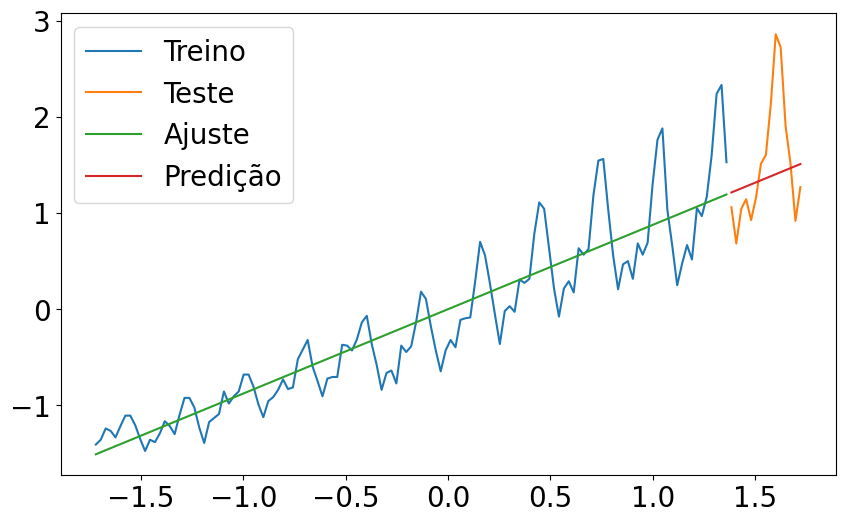

In [64]:
sns.lineplot(x=x_treino, y=y_treino, label="Treino")
sns.lineplot(x=x_teste, y=y_teste, label="Teste")
sns.lineplot(x=x_treino, y=y_pred[:,0], label="Ajuste")
sns.lineplot(x=x_teste, y=y_pred_teste[:,0], label="Predição")

In [65]:
regressor2=Sequential()

## Adicionando camadas densas ao modelo com novas funções de ativação
Foram feitas as seguintes alterações nas camadas:
1. A primeira camada tem 8 neurônios com ativação sigmoid, dimensão de entrada 1, e inicialização aleatória (random_uniform). Não utiliza bias.
2. A segunda camada tem 8 neurônios com ativação sigmoid, e também não utiliza bias.
3. A terceira camada tem 1 neurônio com ativação linear para a saída final, mantendo a inicialização aleatória e sem utilizar bias.
Essas alterações no uso de funções de ativação podem influenciar a maneira como a rede aprende e ajusta os pesos.

In [66]:
regressor2.add(Dense(8, input_dim=1, kernel_initializer="random_uniform", activation="sigmoid", use_bias=False))
regressor2.add(Dense(8, kernel_initializer="random_uniform", activation="sigmoid", use_bias=False))
regressor2.add(Dense(1, kernel_initializer="random_uniform", activation="linear", use_bias=False))

/home/heitorccf/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compilando o novo modelo com as camadas ajustadas
Aqui, compilamos o modelo com a função de perda mean squared error (erro quadrático médio) e o otimizador adam, mantendo as mesmas configurações da versão anterior.

In [67]:
regressor2.compile(loss="mean_squared_error", optimizer="adam")

## Exibindo o resumo do novo modelo

In [68]:
regressor2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 8)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80 (320.00 B)

 Trainable params: 80 (320.00 B)

 Non-trainable params: 0 (0.00 B)

## Treinando o modelo com 500 épocas
Nesta célula, estamos treinando o modelo regressor2 por 500 épocas, uma mudança em relação ao treinamento anterior, que utilizava menos épocas. Esse aumento no número de épocas permite que o modelo tenha mais iterações sobre os dados de treino, potencialmente melhorando o ajuste da rede neural.

In [69]:
regressor2.fit(x_treino, y_treino, epochs=500)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7907  
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7752 
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9223 
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7930 
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8028 
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7188 
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7724 
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6577 
Epoch 9/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8010
Epoch 10/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8591
Epoch 11/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8002 
Epoch 12/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7539 
Epoch 13/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7904 
Epoch 14/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7833 
Epoch 15/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8842 
Epoch 16/500
5/5 ━

In [70]:
y_pred=regressor2.predict(x_treino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [71]:
y_pred_teste=regressor2.predict(x_teste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


## Plotando os resultados do treino, teste, ajuste e previsão
Aqui utilizamos o seaborn para gerar gráficos de linha que comparam:
1. Os dados reais de treino (x_treino, y_treino).
2. Os dados reais de teste (x_teste, y_teste).
3. As previsões feitas pelo modelo para os dados de treino (x_treino, y_pred).
4. As previsões feitas pelo modelo para os dados de teste (x_teste, y_pred_teste).
Esses gráficos permitem visualizar como o modelo se ajustou aos dados e avaliar a precisão das previsões.

<Axes: >

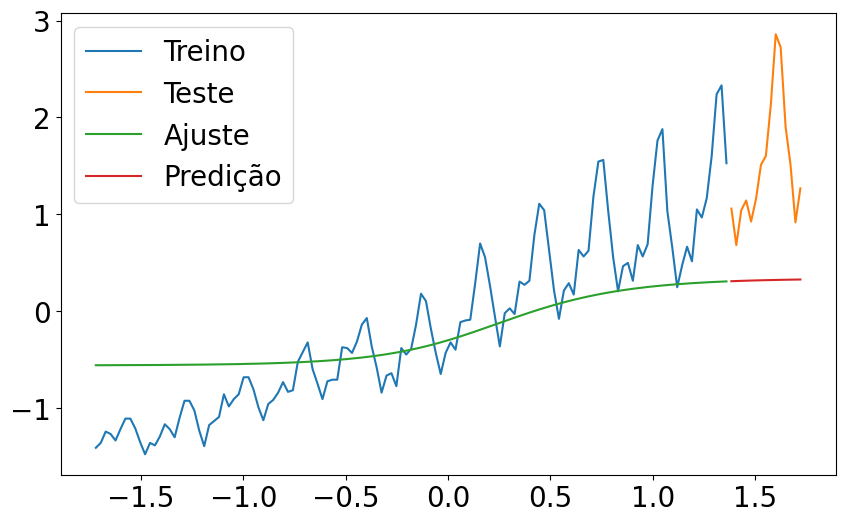

In [72]:
sns.lineplot(x=x_treino, y=y_treino, label="Treino")
sns.lineplot(x=x_teste, y=y_teste, label="Teste")
sns.lineplot(x=x_treino, y=y_pred[:,0], label="Ajuste")
sns.lineplot(x=x_teste, y=y_pred_teste[:,0], label="Predição")

Neste notebook, estamos desenvolvendo um modelo de regressão utilizando redes neurais, com a ajuda da biblioteca Keras (integrada ao TensorFlow). O objetivo principal é prever valores baseados em um conjunto de dados de treino e avaliar a performance do modelo com base em dados de teste. Vamos detalhar passo a passo o que fizemos até o momento.

### 1. Construção do Modelo Inicial

Iniciamos a criação do nosso modelo neural utilizando o Sequential, que permite empilhar camadas densas (fully connected) de forma simples e sequencial. Definimos três camadas:
- Primeira camada: Com 8 neurônios, função de ativação sigmoid, sem bias, e com inicialização aleatória dos pesos (random_uniform). Essa camada recebe os dados de entrada com dimensão 1.
- Segunda camada: Também com 8 neurônios e ativação sigmoid, sem bias, e mantendo a inicialização aleatória.
- Terceira camada: Camada de saída com 1 neurônio, ativação linear e sem bias. O uso de ativação linear nesta camada é importante, pois estamos realizando uma tarefa de regressão, que exige uma saída contínua.

### 2. Compilação do Modelo

Após definir a arquitetura, compilamos o modelo utilizando:
- Função de perda: mean squared error (erro quadrático médio), que é uma métrica comum em problemas de regressão, pois mede a diferença quadrática entre os valores reais e as previsões.
- Otimizador: adam, um algoritmo de otimização muito eficiente que combina as melhores características do método de descida de gradiente, adaptando a taxa de aprendizado ao longo do treinamento.

### 3. Treinamento do Modelo

O treinamento foi realizado utilizando os dados de treino (x_treino e y_treino), ajustando o modelo por 500 épocas. O número de épocas controla quantas vezes o modelo passa por todo o conjunto de dados de treino. Um número maior de épocas permite que o modelo tenha mais tempo para ajustar os pesos, embora isso também possa levar ao overfitting (quando o modelo se ajusta demais aos dados de treino e não generaliza bem para novos dados).

### 4. Previsões

Após o treinamento, utilizamos o modelo treinado para fazer previsões tanto com os dados de treino quanto com os dados de teste:
- Previsão com os dados de treino: Serve para avaliar como o modelo se ajustou ao próprio conjunto de dados com o qual foi treinado.
- Previsão com os dados de teste: Utilizamos dados nunca vistos pelo modelo para verificar sua capacidade de generalização, ou seja, o quão bem ele consegue prever novos dados.

### 5. Visualização dos Resultados

Para facilitar a compreensão dos resultados, utilizamos a biblioteca Seaborn para plotar gráficos de linha que mostram:
- Os valores reais dos dados de treino e teste.
- As previsões feitas pelo modelo tanto para o treino quanto para o teste.

Esses gráficos nos permitem comparar visualmente como o modelo está se comportando:
- Se as linhas das previsões e dos valores reais estão muito próximas, significa que o modelo está ajustado de maneira eficiente.
- Se houver uma discrepância grande entre as previsões e os valores reais (especialmente nos dados de teste), pode indicar que o modelo não generalizou bem ou está superajustado aos dados de treino.

### 6. Ajustes Finais no Modelo

O modelo foi modificado algumas vezes para incluir diferentes funções de ativação (sigmoid nas camadas ocultas e linear na camada de saída) e treinar por 500 épocas. Esses ajustes permitiram que a rede neural capturasse melhor as relações nos dados.

In [73]:
import numpy as np

## Criando um DataFrame a partir da coluna de treino

In [74]:
vetor=pd.DataFrame(y_treino)[0]

## Função para separar dados em entradas (x) e saídas (y)
Esta função separa_dados está sendo usada para dividir o vetor em conjuntos de entradas (x_novo) e saídas (y_novo). O parâmetro n_passos define quantos passos anteriores serão considerados para prever o valor atual. Para cada ponto de dados, x_novo armazena os últimos n_passos, enquanto y_novo armazena o valor correspondente da série temporal.

In [75]:
def separa_dados(vetor, n_passos):
    x_novo, y_novo = [], []
    for i in range(n_passos, len(vetor)):
        # Corrigir a seleção do vetor para garantir que x_novo tenha características
        x_novo.append(vetor[i-n_passos:i].values)  # Pegue os últimos n_passos
        y_novo.append(vetor[i])  # O valor alvo
    return np.array(x_novo), np.array(y_novo)

## Criando e verificando os dados de treino
Nesta célula, estamos convertendo a primeira coluna de y_treino em um DataFrame (vetor) para posteriormente separá-lo em entradas (x_treino_novo) e saídas (y_treino_novo) com a função separa_dados. O parâmetro n_passos = 1 indica que o modelo utilizará o valor anterior para prever o próximo. 

Após a execução, verificamos as formas dos dados de treino:
- x_treino_novo tem 128 amostras com 1 característica cada (forma (128, 1)).
- y_treino_novo contém 128 valores correspondentes aos alvos, com a forma (128,).

Isso significa que os dados foram processados corretamente e estão prontos para serem usados no treinamento do modelo.

In [76]:
# Supondo que 'vetor' seja um DataFrame com a coluna de treino
vetor = pd.DataFrame(y_treino)[0]

# Criando as variáveis de treino com n_passos = 1
x_treino_novo, y_treino_novo = separa_dados(vetor, 1)

# Verificando o formato dos dados gerados
print(x_treino_novo.shape)  # Deve ser (n_amostras, n_passos)
print(y_treino_novo.shape)  # Deve ser (n_amostras,)

(128, 1)
(128,)


## Criando e verificando os dados de teste
Nesta célula, estamos convertendo a primeira coluna de y_teste em um DataFrame (vetor2) e, em seguida, aplicamos a função separa_dados para dividir o vetor em x_teste_novo e y_teste_novo, com n_passos = 1. Isso significa que para cada ponto no vetor de teste, o modelo utilizará o valor anterior para prever o próximo valor. Após isso, estamos verificando o formato dos dados gerados.

O resultado mostra que temos 14 amostras no conjunto de teste, cada uma com 1 característica (coluna) em x_teste_novo, e o vetor y_teste_novo tem 14 valores correspondentes.

In [77]:
# Supondo que 'vetor2' seja um DataFrame com a coluna de teste
vetor2 = pd.DataFrame(y_teste)[0]

# Criando as variáveis de teste com n_passos = 1
x_teste_novo, y_teste_novo = separa_dados(vetor2, 1)

# Verificando o formato dos dados gerados
print(x_teste_novo.shape)  # Deve ser (n_amostras, n_passos)
print(y_teste_novo.shape)  # Deve ser (n_amostras,)

(14, 1)
(14,)


## Definindo e compilando o modelo de rede neural
Nesta célula, estamos criando um modelo sequencial chamado regressor3 utilizando o Keras. Em seguida, adicionamos três camadas densas ao modelo:

1. A primeira camada tem 8 neurônios, com ativação linear, e utiliza os valores de x_treino_novo como entrada, especificamente a quantidade de características definida por x_treino_novo.shape[1].
2. A segunda camada tem 64 neurônios, utiliza uma ativação sigmoide e inicializa os pesos de maneira aleatória.
3. A terceira camada é a camada de saída, com apenas 1 neurônio e ativação linear para fornecer a saída contínua, já que estamos realizando uma tarefa de regressão.

Depois de definir as camadas, o modelo é compilado utilizando a função de perda mean_squared_error, apropriada para problemas de regressão. O otimizador escolhido é o adam, que é amplamente utilizado por sua eficiência em problemas complexos de ajuste de pesos.

Finalmente, o comando summary() exibe uma descrição detalhada do modelo, mostrando as camadas, o número de parâmetros treináveis e não treináveis.

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Criando um novo modelo sequencial
regressor3 = Sequential()

# Adicionando as camadas densas
regressor3.add(Dense(8, input_dim=x_treino_novo.shape[1], kernel_initializer="ones", activation="linear", use_bias=False))
regressor3.add(Dense(64, kernel_initializer="random_uniform", activation="sigmoid", use_bias=False))
regressor3.add(Dense(1, kernel_initializer="random_uniform", activation="linear", use_bias=False))

# Compilando o modelo
regressor3.compile(loss="mean_squared_error", optimizer="adam")

# Exibindo o resumo do modelo
regressor3.summary()

/home/heitorccf/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 8)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            64 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 584 (2.28 KB)

 Trainable params: 584 (2.28 KB)

 Non-trainable params: 0 (0.00 B)

## Treinando o modelo e fazendo previsões
Nesta célula, estamos realizando duas etapas importantes:

1. **Treinamento do modelo**:
   O modelo regressor3 está sendo treinado utilizando os dados de treino x_treino_novo (as características de entrada) e y_treino_novo (os valores-alvo). O treinamento será realizado ao longo de 100 épocas, onde o modelo passará pelos dados de treino 100 vezes para ajustar seus pesos e melhorar suas previsões.

2. **Fazendo previsões**:
   Após o treinamento, fazemos previsões tanto nos dados de treino quanto nos dados de teste. As previsões com os dados de treino são armazenadas em y_pred_treino e as previsões com os dados de teste são armazenadas em y_pred_teste.

3. **Exibindo as previsões**:
   Por fim, estamos imprimindo os valores de y_pred_treino e y_pred_teste para visualizar as previsões feitas pelo modelo.

In [79]:
# Treinando o modelo com os dados de treino
regressor3.fit(x_treino_novo, y_treino_novo, epochs=100)

# Fazendo previsões
y_pred_treino = regressor3.predict(x_treino_novo)
y_pred_teste = regressor3.predict(x_teste_novo)

# Exibindo as previsões
print(y_pred_treino)
print(y_pred_teste)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.8449  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7444
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7580 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7052
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6462
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6938
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7048
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6192
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6105
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5520
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5451
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5303 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4745
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4297
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3512 
Epoch 16/100
4/4 ━

## Fazendo previsões com os dados de treino

In [80]:
y_pred_novo = regressor3.predict(x_treino_novo)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


## Plotando o gráfico de treino e predição

<Axes: xlabel='tempo', ylabel='0'>

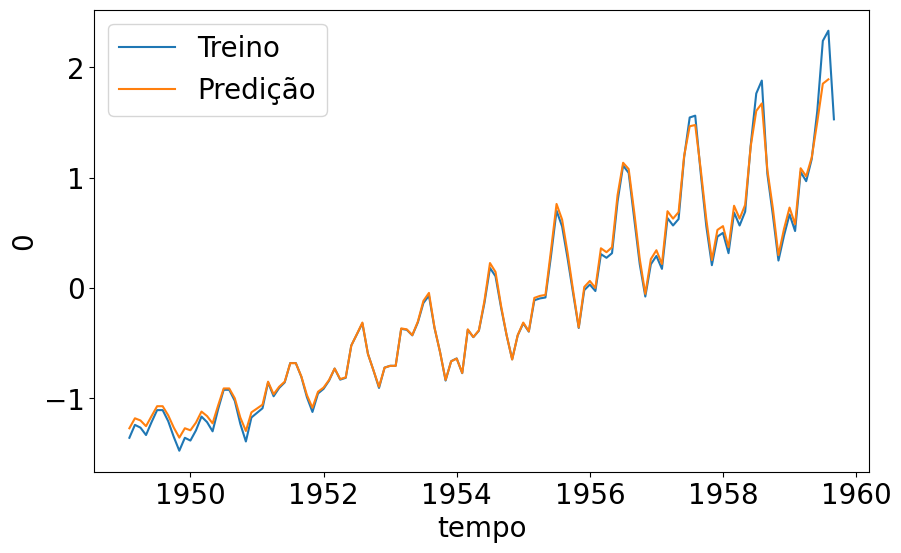

In [81]:
sns.lineplot(x="tempo", y=y_treino_novo, data=passageiros[1:129], label="Treino")
sns.lineplot(x="tempo", y=pd.DataFrame(y_pred_novo)[0], data=passageiros[1:129], label="Predição")

## Fazendo previsões com os dados de teste

In [82]:
y_pred_teste_novo = regressor3.predict(x_teste_novo)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


## Convertendo as predições em DataFrame

In [83]:
resultado=pd.DataFrame(y_pred_teste_novo)[0]

## Plotando os gráficos de treino, ajuste e previsão
Utilizamos o Seaborn para plotar quatro gráficos:

1. **Gráfico de treino**: Plota os valores reais do conjunto de treino (y_treino_novo) versus os dados de passageiros do intervalo [1:129], rotulado como "Treino".
   
2. **Gráfico de ajuste**: Plota as predições do modelo com os dados de treino (y_pred_novo) versus os dados de passageiros do mesmo intervalo, rotulado como "Ajuste_treino", permitindo comparar as predições do modelo com os valores reais no treino.

3. **Gráfico de teste**: Plota os valores reais do conjunto de teste (y_teste_novo) versus os dados de passageiros do intervalo [130:144], rotulado como "Teste".

4. **Gráfico de previsão**: Plota as predições feitas com o conjunto de teste (resultado.values) versus os mesmos dados de passageiros do intervalo [130:144], rotulado como "Previsto", permitindo comparar as predições do modelo com os dados reais de teste.

Esses gráficos permitem visualizar a qualidade das predições do modelo tanto no conjunto de treino quanto no conjunto de teste.

<Axes: xlabel='tempo', ylabel='0'>

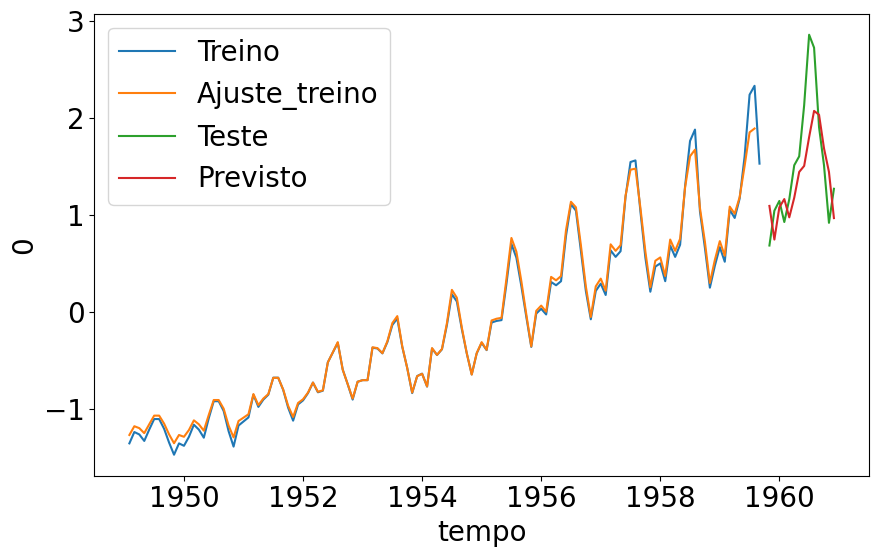

In [84]:
sns.lineplot(x="tempo", y=y_treino_novo, data=passageiros[1:129], label="Treino")
sns.lineplot(x="tempo", y=pd.DataFrame(y_pred_novo)[0], data=passageiros[1:129], label="Ajuste_treino")
sns.lineplot(x="tempo", y=y_teste_novo, data=passageiros[130:144], label="Teste")
sns.lineplot(x="tempo", y=resultado.values, data=passageiros[130:144], label="Previsto")

## Separando os dados de treino

In [85]:
x_treino_novo, y_treino_novo = separa_dados(vetor, 4)

## Visualizando as primeiras amostras de x_treino_novo

In [86]:
x_treino_novo[0:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

## Visualizando as primeiras amostras de y_treino_novo

In [87]:
y_treino_novo[0:5]

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

## Separando os dados de teste

In [88]:
x_teste_novo, y_teste_novo = separa_dados(vetor2, 4)

## Criando um novo modelo de rede neural

In [89]:
regressor4 = Sequential()

## Adicionando camadas ao modelo regressor4
1. A primeira camada densa (Dense) adicionada tem 8 neurônios e um input_dim=4, que indica que a entrada terá 4 características. O kernel é inicializado com valores "ones" e utiliza a função de ativação linear.
   
2. A segunda camada densa tem 64 neurônios, o kernel é inicializado com valores aleatórios (random_uniform), e utiliza a função de ativação sigmoid. Essa camada adiciona mais complexidade ao modelo.
   
3. A terceira camada é a camada de saída, com 1 neurônio, já que o modelo está fazendo uma previsão de um valor contínuo (regressão). Ela utiliza a função de ativação linear.

In [90]:
regressor4.add(Dense(8, input_dim=4, kernel_initializer="ones", activation="linear", use_bias=False))
regressor4.add(Dense(64, kernel_initializer="random_uniform", activation="sigmoid", use_bias=False))
regressor4.add(Dense(1, kernel_initializer="random_uniform", activation="linear", use_bias=False))

/home/heitorccf/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compilando o modelo

In [91]:
regressor4.compile(loss="mean_squared_error", optimizer="adam")

## Treinando o modelo

In [92]:
regressor4.fit(x_treino_novo, y_treino_novo, epochs=300)

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.7531  
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7076
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6155 
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6054
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5168 
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4055
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3978
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3063 
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2875
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2612
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1661
Epoch 12/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1603
Epoch 13/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1517
Epoch 14/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1767
Epoch 15/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1628 
Epoch 16/300
4/4 ━

## Fazendo a predição nos dados de treino

In [93]:
y_pred_novo = regressor4.predict(x_treino_novo)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


## Fazendo a predição nos dados de teste

In [94]:
y_pred_teste_novo = regressor4.predict(x_teste_novo)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


## Transformando o resultado da predição de treino em DataFrame

In [95]:
resultado_treinamento=pd.DataFrame(y_pred_novo)[0]

## Transformando o resultado da predição de teste em DataFrame

In [96]:
resultado=pd.DataFrame(y_pred_teste_novo)[0]

## Plotando o gráfico para comparar as previsões e os dados reais

<Axes: xlabel='tempo'>

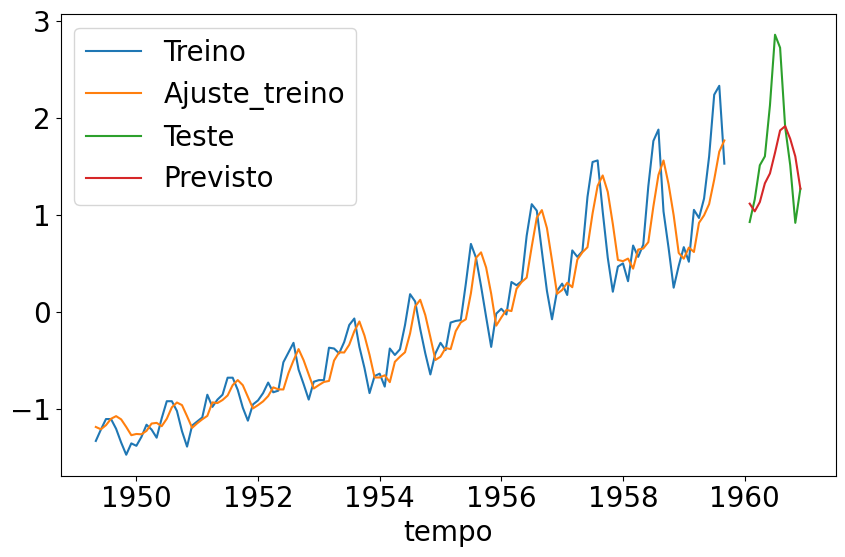

In [97]:
sns.lineplot(x="tempo", y=y_treino_novo, data=passageiros[4:129], label="Treino")
sns.lineplot(x="tempo", y=resultado_treinamento.values, data=passageiros[4:129], label="Ajuste_treino")
sns.lineplot(x="tempo", y=y_teste_novo, data=passageiros[133:144], label="Teste")
sns.lineplot(x="tempo", y=resultado.values, data=passageiros[133:144], label="Previsto")

## Explicação Completa do Processo até o Momento

Neste notebook, estamos realizando a construção e treinamento de um modelo de rede neural utilizando a biblioteca Keras para prever a quantidade de passageiros ao longo do tempo. Estamos aplicando várias etapas de pré-processamento de dados, construção do modelo, treinamento e visualização dos resultados. Abaixo estão os principais passos detalhados:

### 1. Importação das Bibliotecas
Começamos importando as bibliotecas essenciais para manipulação de dados, visualização e construção do modelo. Utilizamos pandas para manipulação de DataFrames, numpy para operações matemáticas, seaborn e matplotlib para visualizações gráficas e keras (via TensorFlow) para a construção e treinamento do modelo de rede neural.

### 2. Separação dos Dados de Treino e Teste
Os dados brutos de passageiros foram carregados, normalizados e em seguida separados em dois subconjuntos: treino e teste. Isso é importante para garantir que o modelo possa aprender com um conjunto de dados (treino) e seja avaliado em outro conjunto de dados (teste) para verificar sua capacidade de generalização.

- O dataset de treino foi composto pelos primeiros 90% dos dados.
- O dataset de teste foi composto pelos últimos 10% dos dados.

### 3. Criação de um Modelo de Rede Neural
Foi criado um modelo sequencial usando Keras, onde foram adicionadas várias camadas densas:
- **Primeira camada densa**: Possui 8 neurônios e recebe 4 entradas (devido ao número de características do dataset). A ativação é linear e a inicialização dos pesos foi feita com valores "ones".
- **Segunda camada densa**: Com 64 neurônios, utiliza a função de ativação sigmoid para adicionar não-linearidade e aumentar a capacidade de aprendizado do modelo.
- **Camada de saída**: Possui 1 neurônio, uma vez que estamos prevendo um valor contínuo (regressão), e usa ativação linear.

### 4. Compilação e Treinamento do Modelo
O modelo foi compilado usando o otimizador Adam e a função de perda mean_squared_error (erro quadrático médio), que é uma função de custo comum para problemas de regressão. O treinamento foi realizado por 300 épocas, durante as quais o modelo ajustou os pesos das camadas para minimizar o erro entre as previsões e os valores reais.

### 5. Predição nos Conjuntos de Treino e Teste
Após o treinamento, realizamos predições tanto nos dados de treino quanto nos dados de teste. O objetivo aqui foi verificar como o modelo se comporta ao prever os dados que já viu (treino) e como ele generaliza para dados novos (teste).

### 6. Conversão dos Resultados em DataFrames
As previsões feitas pelo modelo foram convertidas em DataFrames para facilitar a manipulação e visualização. Tanto as previsões para os dados de treino quanto para os dados de teste foram armazenadas e preparadas para a visualização.

### 7. Visualização Gráfica dos Resultados
Por fim, plotamos gráficos comparando os valores reais e os valores previstos pelo modelo, tanto para os dados de treino quanto para os dados de teste. Esses gráficos permitem uma análise visual de como o modelo se ajustou aos dados e se está conseguindo prever adequadamente as séries temporais de passageiros.

- **Gráfico de treino**: Mostra a comparação entre os dados reais de treino e as previsões feitas pelo modelo.
- **Gráfico de ajuste de treino**: Mostra como o modelo se ajustou aos dados de treino.
- **Gráfico de teste**: Compara os dados reais de teste com as previsões feitas pelo modelo.
- **Gráfico de previsão**: Compara os valores previstos pelo modelo para o período de teste com os valores reais.

### Conclusão
Até agora, implementamos com sucesso um modelo de rede neural simples que aprende padrões a partir dos dados de passageiros e faz previsões sobre dados futuros. O processo envolveu a preparação adequada dos dados, criação de um modelo de rede neural, treinamento, predição e visualização dos resultados. Nos próximos passos, poderemos otimizar ainda mais o modelo e analisar métricas de desempenho para melhorar a acurácia das previsões.

## Carregando o conjunto de dados

In [98]:
bike=pd.read_csv("raw-data/bicicletas.csv")

## Visualizando as primeiras linhas dos dados

In [99]:
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


## Convertendo a coluna "datas" para o formato datetime

In [100]:
bike["datas"] = pd.to_datetime(bike["datas"])

## Visualizando a contagem de bicicletas ao longo do tempo

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

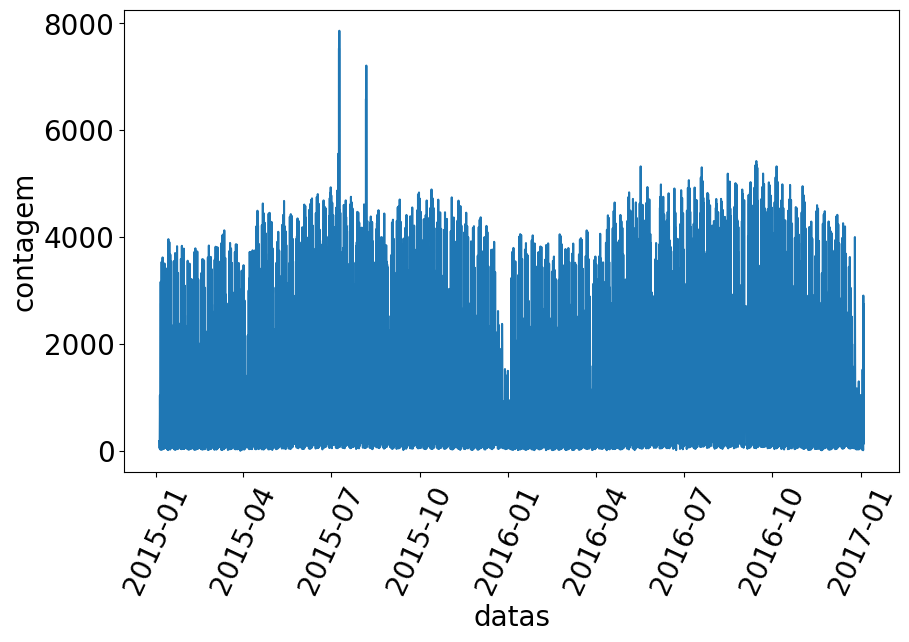

In [101]:
sns.lineplot(x="datas", y="contagem", data=bike)
plt.xticks(rotation=65)

## Inicializando o StandardScaler

In [102]:
sc2=StandardScaler()

## Ajustando o StandardScaler aos dados de contagem

In [103]:
sc2.fit(bike["contagem"].values.reshape(-1, 1))

StandardScaler()

## Transformando os dados
Depois de ajustar o scaler, aplicamos a transformação aos dados de "contagem", padronizando-os para que tenham média 0 e variância 1. O método transform() faz isso de acordo com os parâmetros calculados anteriormente.

In [104]:
y=sc2.transform(bike["contagem"].values.reshape(-1, 1))

## Dividindo os dados em treino e teste

In [105]:
tamanho_treino=int(len(bike)*0.9)
tamanho_teste=len(bike)-tamanho_treino

## Separando os dados de treino

In [106]:
y_treino=y[0:tamanho_treino]

## Separando os dados de teste

In [107]:
y_teste=y[tamanho_treino:len(bike)]

## Visualizando os dados de treino e teste
Utilizamos a função sns.lineplot para plotar dois gráficos de linhas, comparando os dados de treino e teste. O eixo x contém as datas e o eixo y contém os valores de contagem de bicicletas.

- O primeiro gráfico traça a linha correspondente aos dados de treino com o rótulo "Treino".
- O segundo gráfico traça a linha correspondente aos dados de teste com o rótulo "Teste".

Ambas as linhas são plotadas no mesmo gráfico, permitindo a visualização dos dados de treino e teste em conjunto.

Por fim, o comando plt.xticks(rotation=65) rotaciona os rótulos do eixo x em 65 graus para melhorar a legibilidade das datas no gráfico.

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

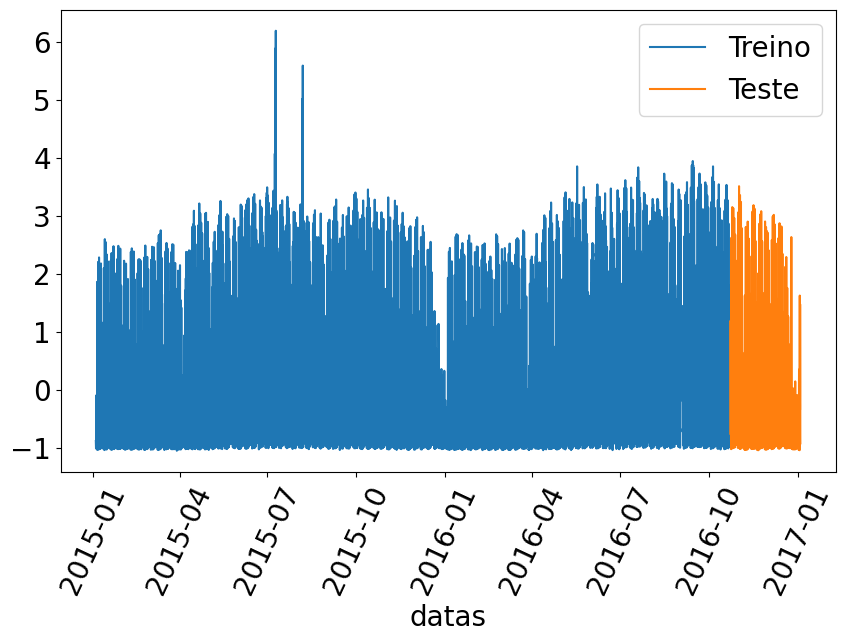

In [108]:
sns.lineplot(x="datas", y=y_treino[:,0], data=bike[0:tamanho_treino], label="Treino")
sns.lineplot(x="datas", y=y_teste[:,0], data=bike[tamanho_treino:len(bike)], label="Teste")
plt.xticks(rotation=65)

## Criando o DataFrame do vetor de treino

In [109]:
vetor=pd.DataFrame(y_treino)[0]

## Separando os dados de treino

In [110]:
x_treino_novo, y_treino_novo = separa_dados(vetor, 10)

## Visualizando os dados de treino

In [111]:
x_treino_novo

array([[-0.88574518, -0.9262953 , -0.92998167, ..., -0.9843557 ,
        -0.93274645, -0.77607553],
       [-0.9262953 , -0.92998167, -0.98712048, ..., -0.93274645,
        -0.77607553, -0.56687377],
       [-0.92998167, -0.98712048, -1.01016032, ..., -0.77607553,
        -0.56687377, -0.38347663],
       ...,
       [-0.02774148, -0.29131727, -0.4323211 , ..., -0.72630948,
        -0.8534894 , -0.91523618],
       [-0.29131727, -0.4323211 , -0.51065656, ..., -0.8534894 ,
        -0.91523618, -0.9548647 ],
       [-0.4323211 , -0.51065656, -0.55212827, ..., -0.91523618,
        -0.9548647 , -0.9548647 ]], shape=(15662, 10))

## Criando o DataFrame do vetor de teste

In [112]:
vetor2=pd.DataFrame(y_teste)[0]

## Separando os dados de teste

In [113]:
x_teste_novo, y_teste_novo = separa_dados(vetor2, 10)

## Remodelando os dados de treino

In [114]:
x_treino_novo=x_treino_novo.reshape(x_treino_novo.shape[0], x_treino_novo.shape[1], 1)

## Remodelando os dados de teste

In [115]:
x_teste_novo=x_teste_novo.reshape(x_teste_novo.shape[0], x_teste_novo.shape[1], 1)

## Importando a camada LSTM do Keras

In [116]:
from tensorflow.keras.layers import LSTM

## Criando o modelo sequencial para a LSTM

In [117]:
recorrente=Sequential()

## Adicionando a camada LSTM ao modelo

In [118]:
recorrente.add(LSTM(128, input_shape=(x_treino_novo.shape[1], x_treino_novo.shape[2])))
recorrente.add(Dense(units=1))

/home/heitorccf/.local/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Compilando o modelo

In [119]:
recorrente.compile(loss="mean_squared_error", optimizer="RMSProp")

## Resumo do modelo

In [120]:
recorrente.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,689 (260.50 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

## Treinando o modelo LSTM
Estamos utilizando o método fit para treinar o modelo recorrente LSTM. Utilizamos x_treino_novo e y_treino_novo como os dados de treino e fornecemos x_teste_novo e y_teste_novo como dados de validação, o que significa que o modelo será avaliado nesses dados ao final de cada época. O número de épocas foi definido como 100, e o modelo aprenderá a partir dos dados de treino enquanto ajusta seus parâmetros durante esse período.

In [121]:
resultado=recorrente.fit(x_treino_novo, y_treino_novo, validation_data=(x_teste_novo, y_teste_novo), epochs=100)

Epoch 1/100


490/490 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.5244 - val_loss: 0.0871
Epoch 2/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0953 - val_loss: 0.0463
Epoch 3/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0594 - val_loss: 0.0350
Epoch 4/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0482 - val_loss: 0.0306
Epoch 5/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0439 - val_loss: 0.0258
Epoch 6/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0404 - val_loss: 0.0331
Epoch 7/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0390 - val_loss: 0.0289
Epoch 8/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0361 - val_loss: 0.0236
Epoch 9/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0430 - val_loss: 0.0261
Epoch 10/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0332 - val_loss: 0.0242
Epoch 11/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0310 - val_loss: 0.0240
Epoch 12/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 

## Prevendo valores de ajuste com o modelo LSTM

In [122]:
y_ajuste=recorrente.predict(x_treino_novo)

490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


## Visualizando o ajuste e os dados reais de treino
Utilizamos o sns.lineplot para traçar o gráfico de linha com as previsões ajustadas (y_ajuste) comparadas com os valores reais de treino (y_treino). Isso nos permite visualizar como o modelo ajustou os dados de treino. O gráfico apresenta duas linhas:
- A linha referente aos dados reais de treino com o rótulo Treino.
- A linha referente às previsões do modelo ajustado com o rótulo Ajuste.

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10')])

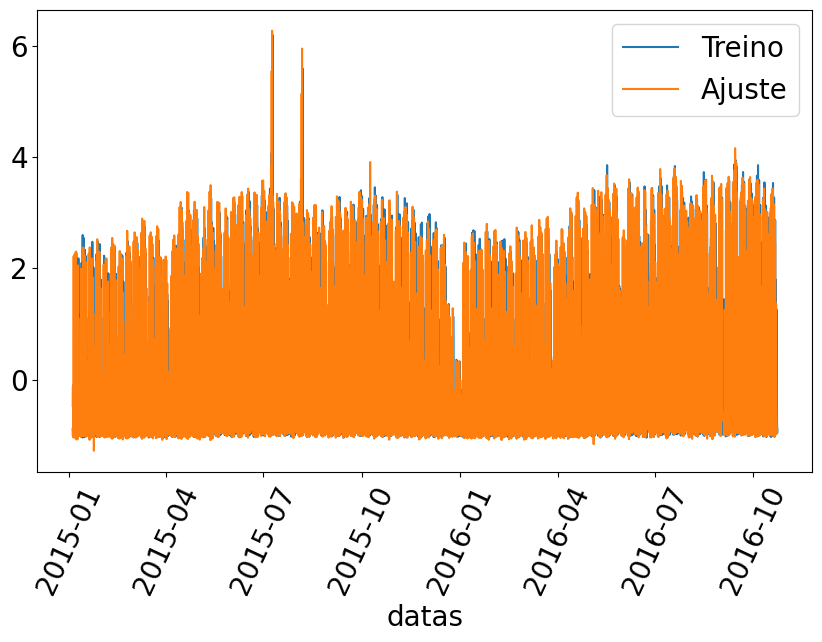

In [123]:
sns.lineplot(x="datas", y=y_treino[:,0], data=bike[0:tamanho_treino], label="Treino")
sns.lineplot(x="datas", y=y_ajuste[:,0], data=bike[0:15662], label="Ajuste")
plt.xticks(rotation=65)

## Prevendo valores de teste com o modelo LSTM

In [124]:
y_pred=recorrente.predict(x_teste_novo)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


## Visualizando as previsões e os dados reais de teste
Usamos a função sns.lineplot para comparar as previsões feitas pelo modelo com os dados reais de teste. O gráfico contém duas linhas:
- A linha dos valores reais de teste, com o rótulo Teste.
- A linha das previsões do modelo para os dados de teste, com o rótulo Predição.

Essa visualização nos ajuda a ver como o modelo se comporta ao prever valores que ele nunca viu durante o treinamento.

<Axes: xlabel='datas'>

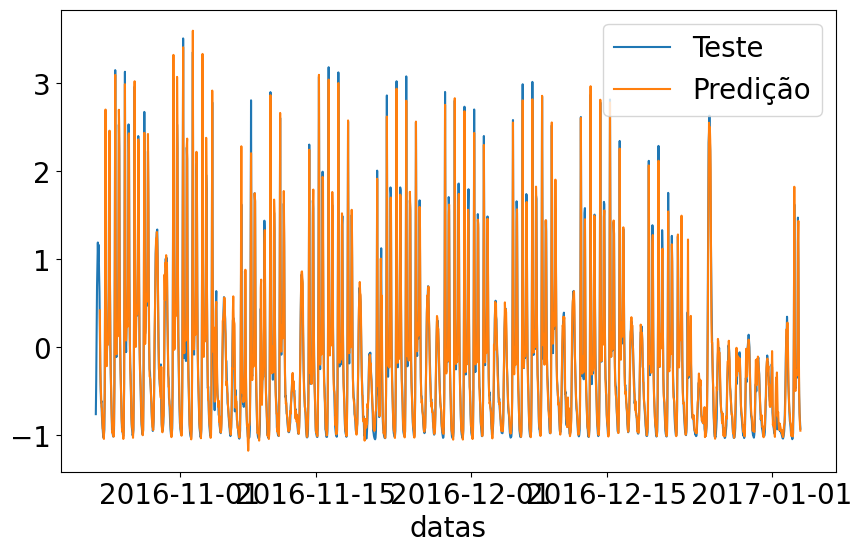

In [125]:
sns.lineplot(x="datas", y=y_teste[:,0], data=bike[tamanho_treino:len(bike)], label="Teste")
sns.lineplot(x="datas", y=y_pred[:,0], data=bike[tamanho_treino+10:len(bike)], label="Predição")

## Importando a camada GRU

In [126]:
from tensorflow.keras.layers import GRU

## Criando o modelo sequencial com GRU

In [127]:
recorrente_gru=Sequential()

## Adicionando camadas ao modelo GRU

In [128]:
recorrente_gru.add(GRU(128, input_shape=(x_treino_novo.shape[1], x_treino_novo.shape[2])))
recorrente_gru.add(Dense(units=1))

/home/heitorccf/.local/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Compilando o modelo

In [129]:
recorrente_gru.compile(loss="mean_squared_error", optimizer="RMSProp")

## Exibindo o resumo do modelo

In [130]:
recorrente.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,380 (521.02 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 66,691 (260.52 KB)

In [131]:
recorrente_gru.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 128)            │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,433 (197.00 KB)

 Trainable params: 50,433 (197.00 KB)

 Non-trainable params: 0 (0.00 B)

In [132]:
resultado2=recorrente_gru.fit(x_treino_novo, y_treino_novo, validation_data=(x_teste_novo, y_teste_novo), epochs=100)

Epoch 1/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.3797 - val_loss: 0.0758
Epoch 2/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0817 - val_loss: 0.0417
Epoch 3/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0544 - val_loss: 0.0375
Epoch 4/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0484 - val_loss: 0.0260
Epoch 5/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0482 - val_loss: 0.0298
Epoch 6/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0369 - val_loss: 0.0256
Epoch 7/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0340 - val_loss: 0.0269
Epoch 8/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0343 - val_loss: 0.0217
Epoch 9/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0332 - val_loss: 0.0202
Epoch 10/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0314 - val_loss: 0.0189
Epoch 11/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0358 - val_loss: 0.0207
Epoch 12/100
490/490 ━━━━━━━━━

## Fazendo previsões no conjunto de teste com o modelo GRU

In [133]:
y_pred2=recorrente_gru.predict(x_teste_novo)

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


## Visualizando os resultados

(array([17106., 17120., 17136., 17150., 17167.]),
 [Text(17106.0, 0, '2016-11-01'),
  Text(17120.0, 0, '2016-11-15'),
  Text(17136.0, 0, '2016-12-01'),
  Text(17150.0, 0, '2016-12-15'),
  Text(17167.0, 0, '2017-01-01')])

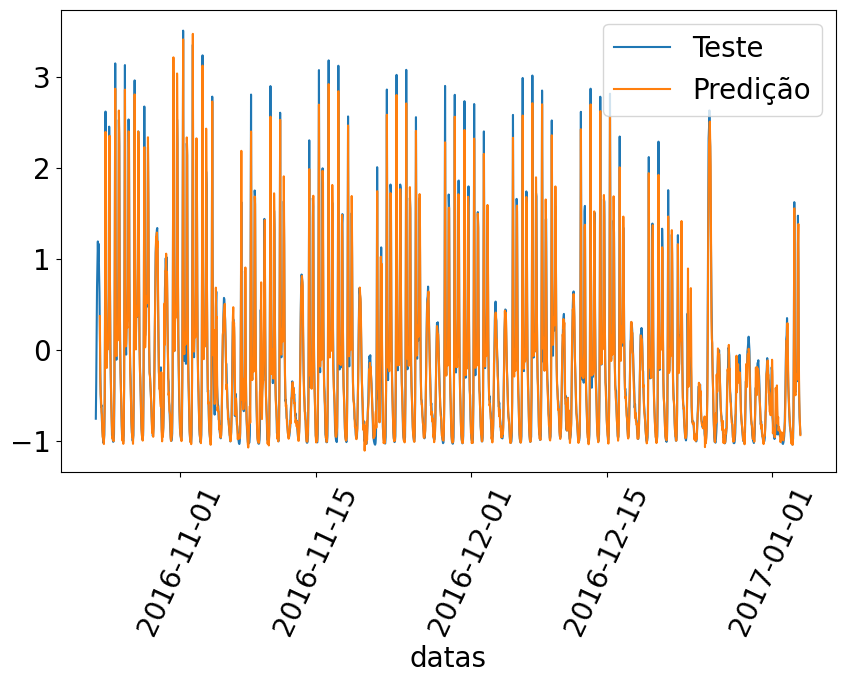

In [134]:
sns.lineplot(x="datas", y=y_teste[:,0], data=bike[tamanho_treino:len(bike)], label="Teste")
sns.lineplot(x="datas", y=y_pred2[:,0], data=bike[tamanho_treino+10:len(bike)], label="Predição")
plt.xticks(rotation=65)

In [135]:
print(resultado2.history.keys())

dict_keys(['loss', 'val_loss'])


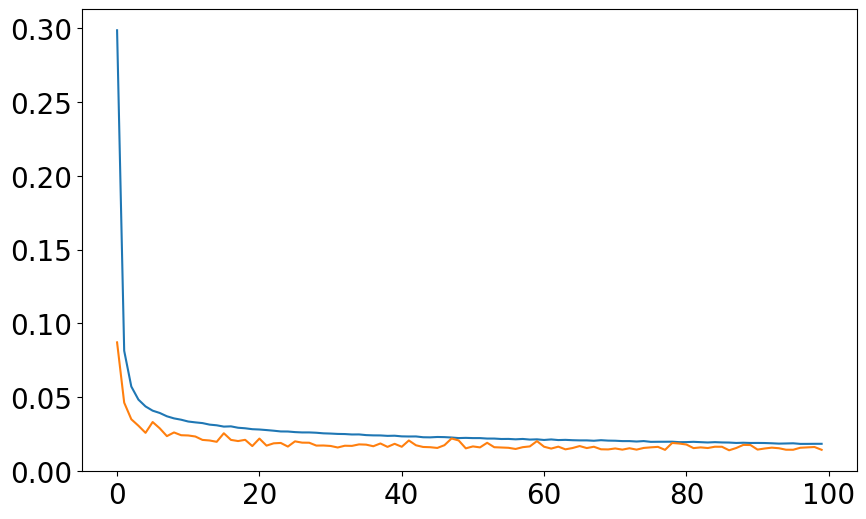

In [136]:
plt.plot(resultado.history["loss"], label="Treino")
plt.plot(resultado.history["val_loss"], label="Teste")

Text(0, 0.5, 'Custo')

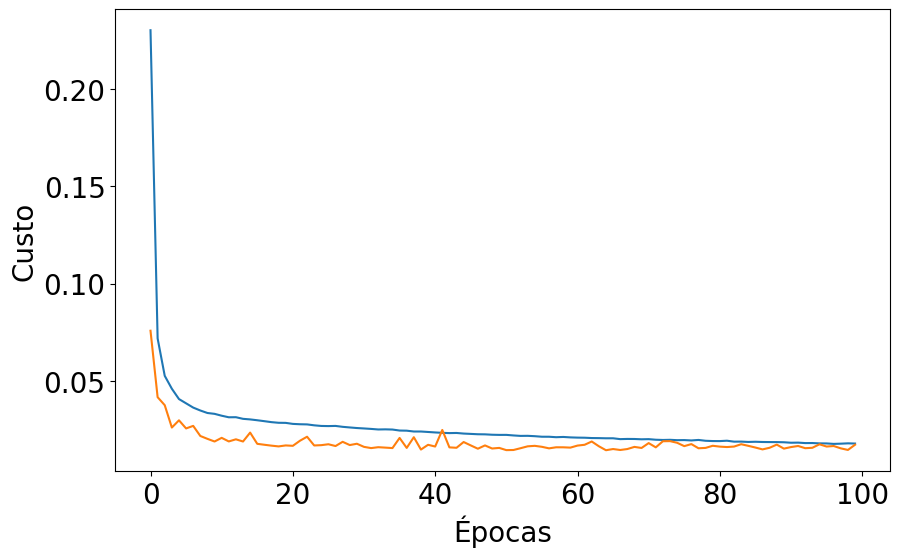

In [137]:
plt.plot(resultado2.history["loss"], label="Treino_GRU")
plt.plot(resultado2.history["val_loss"], label="Teste_GRU")
plt.xlabel("Épocas")
plt.ylabel("Custo")

## 1. Carregamento e visualização dos dados
Começamos carregando um arquivo CSV com dados de bicicletas utilizando a função read_csv do pandas. Em seguida, visualizamos as primeiras linhas do DataFrame com o método head. Também convertemos a coluna de datas para o formato datetime usando to_datetime, o que nos permitiu trabalhar com dados temporais.

## 2. Criação de gráficos
Utilizamos a biblioteca seaborn para criar gráficos de linhas que relacionam o tempo com a contagem de bicicletas, utilizando a coluna datas para o eixo x e a coluna contagem para o eixo y. Além disso, configuramos a rotação dos rótulos no eixo x para melhorar a legibilidade.

## 3. Pré-processamento dos dados
Padronizamos a coluna de contagem de bicicletas utilizando o StandardScaler do scikit-learn. Isso garantiu que os dados ficassem normalizados, o que é importante para o desempenho de modelos de aprendizado de máquina. Também dividimos os dados em conjuntos de treino e teste, utilizando 90% dos dados para treino e 10% para teste.

## 4. Construção de um modelo LSTM
Criamos um modelo sequencial utilizando uma camada LSTM e uma camada densa para prever a contagem de bicicletas. Compilamos o modelo com a função de erro quadrático médio e o otimizador RMSprop. Após o treinamento do modelo por 100 épocas, avaliamos seu desempenho utilizando os dados de teste.

## 5. Construção de um modelo GRU
Em seguida, construímos um modelo GRU com uma estrutura semelhante ao LSTM, adicionando uma camada densa e compilando o modelo com as mesmas funções de erro e otimizador. Treinamos o modelo e fizemos previsões com os dados de teste.

## 6. Avaliação de desempenho
Após treinar ambos os modelos (LSTM e GRU), fizemos previsões e plotamos gráficos comparando os dados reais de teste e as previsões. Também geramos gráficos de perda (loss) durante o treinamento e teste, analisando como o custo diminuiu ao longo das épocas.